<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Before-we-start" data-toc-modified-id="Before-we-start-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Before we start</a></span><ul class="toc-item"><li><span><a href="#Methodology" data-toc-modified-id="Methodology-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Methodology</a></span></li><li><span><a href="#Big-Picture" data-toc-modified-id="Big-Picture-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Big Picture</a></span></li></ul></li><li><span><a href="#Data" data-toc-modified-id="Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data</a></span><ul class="toc-item"><li><span><a href="#XML" data-toc-modified-id="XML-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>XML</a></span></li><li><span><a href="#JSON" data-toc-modified-id="JSON-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>JSON</a></span></li><li><span><a href="#CSV" data-toc-modified-id="CSV-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>CSV</a></span></li><li><span><a href="#CDR-CSV" data-toc-modified-id="CDR-CSV-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>CDR CSV</a></span></li><li><span><a href="#Milano-Grid-Dataset" data-toc-modified-id="Milano-Grid-Dataset-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Milano Grid Dataset</a></span></li></ul></li><li><span><a href="#Analytics" data-toc-modified-id="Analytics-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Analytics</a></span><ul class="toc-item"><li><span><a href="#Statistics" data-toc-modified-id="Statistics-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Statistics</a></span></li><li><span><a href="#Visualization" data-toc-modified-id="Visualization-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Visualization</a></span></li></ul></li><li><span><a href="#Mobile" data-toc-modified-id="Mobile-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Mobile</a></span></li></ul></div>

In [1]:
%load_ext nb_js_diagrammers

In [2]:
%%html
<style>
.prompt_container { display: none !important; }
.prompt { display: none !important; }
.run_this_cell { display: none !important; }

.slides {
    position: absolute;
    top: 0;
    left: 0;
}
</style>

# Mobile Data Analytics

Cell

Thi-Mai-Trang Nguyen CELL (LIP6-Sorbonne Université)

**Fabien Mathieu** (Swapcard)

## Before we start

# About me

Job: industry CS Researcher
- Orange Labs
- Inria
- Bell Labs
- Swapcard

Interests:
- Graphs
- Modeling
- Networks

### Methodology

# Methodology

- Programming language for CELL11/CELL12 will be Python.
- Course and practicals are made on notebooks (jupyter or jupyterlab).
- Available on https://github.com/balouf/cell

# Jupyter notebook?

A notebook is just a text file with extension `.ipynb` that contains cells.
- Two main types of cells:
  - Markdown cells to write formatted text. You can itemize or write maths like $\frac{\sqrt{\pi}}{2}$
  - Code cell to execute Python code
- This is a markdown cell

In [6]:
# This is a code cell
x = 1+1

In [7]:
# Cell codes share the same workspace
x

2

# Using Jupyter Notebook

Two modes:
- Command mode (blue). Hit `esc` to enter it
- Edit mode (green). Hit `enter` on a cell to edit
- There are many shortcuts (hit `H` on command mode to see them)

To go further:
- https://www.lincs.fr/events/python-101/
- https://www.lincs.fr/events/hands-on-series-jupyter-notebook/

### Big Picture

# Big picture

Data analytics (mobile or not) always follow the same pattern:
- There is some raw data somewhere
- Retrieve/load/parse/pre-process
- Work on it

This course:
- Generic examples
- One Mobile use case: the Milano grid

# Big picture

In [4]:
%%mermaid_magic -h 640
graph LR
    subgraph S["Data (file/URL/SQL...)"]
        direction RL
        xcl[Excel]
        csv[CSV/TSV]
        json[JSON]
        xml[XML]
        other[...]
    end
    subgraph in[In-memory object]
    direction TB
        direction RL
        df["Dataframe (e.g. Pandas)"]
        ar["Array (e.g. Numpy)"]
        subgraph po["Python object"]
        direction RL
        List
        Dict
        cc[Custom class]
        end
    end
    xcl --> df;
    csv --> df; csv --> ar; csv --> po;
    json --> po; xml --> po; other --> po;
    subgraph p[Processing]
    stats[Statistics]
    disp[Display]
    nn[Training]
    tf[Transform]
    end
    df --> stats; df --> disp;
    ar --> stats; ar --> disp; ar--> nn; ar --> tf;
    po --> nn; po --> tf;
    

## Data

# Data

There are several text-based standard formats for exchanging data:
- XML: legacy format (but still used in many places).
- JSON: compact representation of structured data.
- CSV: compact representation of SQL-like tables

### XML

# XML

- A human-readable way to represent data
- Introduced as a generalization / normalization of HTML
- Extensible Markup Language (XML) 
- Serializable (can be directly loaded/dumped from string)
- Used by many languages

# XML specification

XML is made of markups similar to HTML:
- tag: something that starts with < and ends with >.
  - start-tag, such as `<section>`
  - end-tag, such as `</section>`
  - empty-element tag, such as `<line-break />
- element: empty-element tag or anything between a start and matching tags (included)
- content: anything between a start and matching tags (excluded). Can contain text and/or element(s)
- attribute: key-value pairs stored inside a start or empty tag.

# Example #1

In [15]:
xml = """
<?xml version="1.0" encoding="UTF-8"?> 
<note> 
<to>Tove</to>
<from>Jani</from> 
<heading>Reminder</heading>
<body>Don't forget me this weekend!</body> 
</note>
"""

# Example #2

In [16]:
xml = """<?xml version="1.0"?> <data> 
<country name="Liechtenstein"> <rank>1</rank>
<year>2008</year> <gdppc>141100</gdppc>
<neighbor name="Austria" direction="E"/> 
<neighbor name="Switzerland" direction="W"/> 
</country>
<country name="Singapore"> 
<rank>4</rank>
<year>2011</year> <gdppc>59900</gdppc>
<neighbor name="Malaysia" direction="N"/> 
</country>
<country name="Panama"> 
<rank>68</rank>
<year>2011</year> <gdppc>13600</gdppc>
<neighbor name="Costa Rica" direction="W"/> 
<neighbor name="Colombia" direction="E"/> 
</country> </data> 
"""
with open('data.xml', 'wt') as f:
    f.write(xml)

# Parsing XML with the xml package

xml.etree.ElementTree loads the whole file, you can then navigate in the tree structure.

In [17]:
import xml.etree.ElementTree as ET
root = ET.parse('data.xml').getroot()
print(f"Main tag: {root.tag}; main attributes: {root.attrib}")
print(f"Text of second element of first element: {root[0][1].text}")
for child in root:
    print(child.tag, child.attrib)
for n in root.iter('neighbor'):
    print(n.attrib)

Main tag: data; main attributes: {}
Text of second element of first element: 2008
country {'name': 'Liechtenstein'}
country {'name': 'Singapore'}
country {'name': 'Panama'}
{'name': 'Austria', 'direction': 'E'}
{'name': 'Switzerland', 'direction': 'W'}
{'name': 'Malaysia', 'direction': 'N'}
{'name': 'Costa Rica', 'direction': 'W'}
{'name': 'Colombia', 'direction': 'E'}


# Parsing XML with the xml package

You can also load from string (instead of from file)

In [18]:
root = ET.fromstring(xml) 
print(f"Main tag: {root.tag}; main attributes: {root.attrib}")
print(f"Text of second element of first element: {root[0][1].text}")

Main tag: data; main attributes: {}
Text of second element of first element: 2008


For very large files, you may want to iterate from file instead of loading the full content

# Parsing XML with BeautifulSoup

In [19]:
from bs4 import BeautifulSoup as Soup
soup = Soup(xml, features='xml')
soup

<?xml version="1.0" encoding="utf-8"?>
<data>
<country name="Liechtenstein"> <rank>1</rank>
<year>2008</year> <gdppc>141100</gdppc>
<neighbor direction="E" name="Austria"/>
<neighbor direction="W" name="Switzerland"/>
</country>
<country name="Singapore">
<rank>4</rank>
<year>2011</year> <gdppc>59900</gdppc>
<neighbor direction="N" name="Malaysia"/>
</country>
<country name="Panama">
<rank>68</rank>
<year>2011</year> <gdppc>13600</gdppc>
<neighbor direction="W" name="Costa Rica"/>
<neighbor direction="E" name="Colombia"/>
</country> </data>

# Parsing XML with BeautifulSoup

In [20]:
print("\n".join( c.name+" "+str(c.attrs) for c in soup.data.contents if c.name))

country {'name': 'Liechtenstein'}
country {'name': 'Singapore'}
country {'name': 'Panama'}


In [21]:

print("\n".join( str(c.attrs) for c in soup('neighbor')))

{'name': 'Austria', 'direction': 'E'}
{'name': 'Switzerland', 'direction': 'W'}
{'name': 'Malaysia', 'direction': 'N'}
{'name': 'Costa Rica', 'direction': 'W'}
{'name': 'Colombia', 'direction': 'E'}


### JSON

# JSON

- A simple way to represent data
- Introduced for Javascript (JavaScript Object Notation)
- More compact than HTML/XML, but still easy to read by humans
- Anything that can be represented in XML can be represented in JSON
- Serializable (can be directly dumped into a string)
- Widely used by many langages

# JSON specification

JSON data can be:
- A number
- A string
- A boolean, `true` or `false` (-> `True` or `False` in Python)
- An ordered list of elements (-> Python `list`)
- A collection of key–value pairs where the keys are strings (-> Python `dict`)
- null: an empty value, using the word `null` (-> `None`)

# Example: from/to string

In [9]:
from json import loads, dumps
dumps(['aéçèà',1234,[4,5,6], {'key1': None, 'key2': True}])

'["a\\u00e9\\u00e7\\u00e8\\u00e0", 1234, [4, 5, 6], {"key1": null, "key2": true}]'

In [10]:
loads('["a\\u00e9\\u00e7\\u00e8\\u00e0", 1234, [4, 5, 6], {"key1": null, "key2": true}]')

['aéçèà', 1234, [4, 5, 6], {'key1': None, 'key2': True}]

# Example: from/to file

In [11]:
from json import load, dump
data = {}
data['people'] = []
data['people'].append({'name': 'Mark', 'website': 'facebook.com'})
data['people'].append({'name': 'Larry', 'website': 'google.com'})
data['people'].append({'name': 'Tim', 'website': 'apple.com',})
with open('data.json', 'wt') as f:
    dump(data, f)

# Example: from/to file

In [12]:
with open('data.json', 'rt') as f:
    raw = f.read()
raw

'{"people": [{"name": "Mark", "website": "facebook.com"}, {"name": "Larry", "website": "google.com"}, {"name": "Tim", "website": "apple.com"}]}'

In [13]:
with open('data.json', 'rt') as f:
    data = load(f)
print('\n'.join( f"Name: {p['name']}; Website: {p['website']}" for p in data['people']))

Name: Mark; Website: facebook.com
Name: Larry; Website: google.com
Name: Tim; Website: apple.com


# Fun fact: Jupyter Notebooks are... json

In [14]:
with open('CELL22-C11-Mobile-Data-Analytics.ipynb', encoding='utf8') as f:
    this_notebook = load(f)
this_notebook['cells'][13:15]

[{'cell_type': 'markdown',
  'id': 'dbf909f7',
  'metadata': {},
  'source': ['A notebook is just a text file with extension `.ipynb` that contains cells.\n',
   '- Two main types of cells:\n',
   '  - Markdown cells to write formatted text. You can itemize or write maths like $\\frac{\\sqrt{\\pi}}{2}$\n',
   '  - Code cell to execute Python code\n',
   '- This is a markdown cell']},
 {'cell_type': 'code',
  'execution_count': 4,
  'id': 'eb2d1671',
  'metadata': {'ExecuteTime': {'end_time': '2023-01-11T08:04:22.947865Z',
    'start_time': '2023-01-11T08:04:22.938861Z'},
   'cell_style': 'split'},
  'outputs': [],
  'source': ['# This is a code cell\n', 'x = 1+1']}]

### CSV

# DSV/CSV

- DSV/CSV: Delimiter/Comma Separated Values
- Cheap format for tables (SQL outputs)
- Each line is a row
- Column are separated by a *delimiter*
  - Comma (default)
  - Tabulation, colon (:), semi-colon(;), space, pipe (|)...
- The names of columns (field names) can be:
  - internal, in the first row
  - external, e.g. in a separate file

# Example: the Big Mac index

https://github.com/TheEconomist/big-mac-data

In [22]:
from requests import Session
s = Session()
url = "https://github.com/TheEconomist/big-mac-data/raw/master/source-data/big-mac-source-data.csv"
big_mac = s.get(url).text
print(big_mac[:300])

name,iso_a3,currency_code,local_price,dollar_ex,GDP_dollar,date
Argentina,ARG,ARS,2.5,1,,2000-04-01
Australia,AUS,AUD,2.59,1.68,,2000-04-01
Brazil,BRA,BRL,2.95,1.79,,2000-04-01
Britain,GBR,GBP,1.9,0.632911392,,2000-04-01
Canada,CAN,CAD,2.85,1.47,,2000-04-01
Chile,CHL,CLP,1260,514,,2000-04-01
China,C


# Using the csv module

In [23]:
from io import StringIO # Make a string look like a file
import csv
with StringIO(big_mac) as csvfile:
    r = csv.reader(csvfile)
    for row in r:
        if(row[0] == "France"):
            print(str(row[0]) + ',' + str(row[3]) + ',' + str(row[6]))

France,3.5,2011-07-01
France,3.6,2012-01-01
France,3.6,2012-07-01
France,3.6,2013-01-01
France,3.9,2013-07-01
France,3.8,2014-01-01
France,3.9,2014-07-01
France,3.9,2015-01-01
France,4.1,2015-07-01
France,4.1,2016-01-01
France,4.1,2016-07-01
France,4.1,2017-01-01
France,4.1,2017-07-01
France,4.2,2018-01-01
France,4.2,2018-07-01
France,4.2,2019-01-01
France,4.2,2019-07-09
France,4.2,2020-01-14
France,4.2,2020-07-01
France,4.2,2021-01-01
France,4.3,2021-07-01
France,4.35,2022-01-01
France,4.7,2022-07-01


# Using the csv module

In [24]:
with StringIO(big_mac) as csvfile:
    r = csv.reader(csvfile)
    for i, row in enumerate(r):
        print(str(row[0]) + ',' + str(row[3]) + ',' + str(row[6]))
        if i>6:
            break

name,local_price,date
Argentina,2.5,2000-04-01
Australia,2.59,2000-04-01
Brazil,2.95,2000-04-01
Britain,1.9,2000-04-01
Canada,2.85,2000-04-01
Chile,1260,2000-04-01
China,9.9,2000-04-01


# Using the csv module

In [25]:
with StringIO(big_mac) as csvfile:
    r = csv.DictReader(csvfile)
    for row in r:
        if row['currency_code'] == 'EUR' and '2022-07' in row['date']:
            print(row['name'], row['local_price'])

Austria 4.35
Belgium 4.6
Germany 4.58
Spain 4.58
Estonia 3.4
Euro area 4.65
Finland 5.25
France 4.7
Greece 4
Ireland 5
Italy 5.1
Lithuania 3.05
Latvia 3
Netherlands 4.5
Portugal 4
Slovakia 3.9
Slovenia 3.2


# Pandas

- Pandas is a powerful solution for processing CSV / SQL / XLS
- For CSV: a function `read_csv` is provided
- Delimiter can be specified with the `delimiter` option (defaults to `,`)
- Field names can be extracted internally (default: first row) or externally (passed with the `names` option)

# Pandas

In [26]:
import pandas as pd
with StringIO(big_mac) as csvfile:
    big_mac_df = pd.read_csv(csvfile)
big_mac_df

,name,iso_a3,currency_code,local_price,dollar_ex,GDP_dollar,date
0,Argentina,ARG,ARS,2.50,1.000000,NaN,2000-04-01
1,Australia,AUS,AUD,2.59,1.680000,NaN,2000-04-01
2,Brazil,BRA,BRL,2.95,1.790000,NaN,2000-04-01
3,Britain,GBR,GBP,1.90,0.632911,NaN,2000-04-01
4,Canada,CAN,CAD,2.85,1.470000,NaN,2000-04-01
...,...,...,...,...,...,...,...
1943,Uruguay,URY,UYU,255.00,41.910000,15169.153,2022-07-01
1944,United States,USA,USD,5.77,1.000000,63078.471,2022-07-01
1945,Venezuela,VEN,VES,10.00,5.673200,1690.659,2022-07-01
1946,Vietnam,VNM,VND,69000.00,23417.000000,3520.738,2022-07-01


# Manual loading

In [27]:
from datetime import datetime
from dataclasses import dataclass
@dataclass
class BMI:
    name: str
    cc: str
    cu: str
    price: float
    d_ex: float
    gpd: float
    date: datetime
        
    def __post_init__(self):
        self.price = float(self.price) if self.price else None
        self.d_ex = float(self.d_ex) if self.d_ex else None
        self.gpd = float(self.gpd) if self.gpd else None
        self.date = datetime.strptime(self.date, "%Y-%m-%d")
        

with StringIO(big_mac) as csvfile:
    fields = csvfile.readline().strip().split(',')
    data = [BMI(*line.strip().split(',')) for line in csvfile.readlines()]

# Manual loading

In [28]:
data[500:506]

[BMI(name='Norway', cc='NOR', cu='NOK', price=45.0, d_ex=6.24625, gpd=None, date=datetime.datetime(2010, 7, 1, 0, 0)),
 BMI(name='Pakistan', cc='PAK', cu='PKR', price=210.0, d_ex=85.525, gpd=None, date=datetime.datetime(2010, 7, 1, 0, 0)),
 BMI(name='Peru', cc='PER', cu='PEN', price=10.0, d_ex=2.8275, gpd=None, date=datetime.datetime(2010, 7, 1, 0, 0)),
 BMI(name='Philippines', cc='PHL', cu='PHP', price=102.0, d_ex=46.47, gpd=None, date=datetime.datetime(2010, 7, 1, 0, 0)),
 BMI(name='Poland', cc='POL', cu='PLN', price=8.3, d_ex=3.1969, gpd=None, date=datetime.datetime(2010, 7, 1, 0, 0)),
 BMI(name='Russia', cc='RUS', cu='RUB', price=71.0, d_ex=30.44325, gpd=None, date=datetime.datetime(2010, 7, 1, 0, 0))]

### CDR CSV

# Mobile: Call Detail Record (CDR)

Call Detail Record (CDR)
- Data on mobile traffic (call, SMS, Internet) are usually collected by mobile operator in the form of Call Detail Record (CDR)
- Used for billing and network management
- There exist dozen types of CDR
- An example of CDR: Timestamp, Caller_id, Callee_id, Call_duration, Antenna_code

# Example of CDR data structure

From https://arxiv.org/pdf/1210.0137v1.pdf

`CREATE TABLE H_A_FLOWS (
date_hour TIMESTAMP,
originating_ant INTEGER,
terminating_ant INTEGER,
nb_voice_calls INTEGER,
duration_voice_calls INTEGER
);`

`2012-04-28 23:00:00 1236 786 2 96
2012-04-28 23:00:00 1236 804 1 539
2012-04-28 23:00:00 1236 867 3 1778
2012-04-28 23:00:00 1236 939 1 1
2012-04-28 23:00:00 1236 1020 6 108
2012-04-28 23:00:00 1236 1065 1 1047
2012-04-28 23:00:00 1236 1191 1 67
2012-04-28 23:00:00 1236 1236 18 2212
2012-04-28 23:00:00 1237 323 1 636
2012-04-28 23:00:00 1237 710 1 252`

# Example of CDR data structure

From https://arxiv.org/pdf/1210.0137v1.pdf

`CREATE TABLE ANT_POS(
antenna_id INTEGER,
longitude FLOAT,
latitude FLOAT,
);`

`1 -4.143452 5.342044
2 -3.913602 5.341612
3 -3.967045 5.263331
4 -4.070007 5.451365
5 -3.496235 6.729410
6 -3.485944 6.729422
7 -3.981175 5.273144
8 -3.911705 5.858010
9 -4.014445 5.421120`

### Milano Grid Dataset

# Milano Grid Dataset

- In 2014, Telecom Italia launches the Big Data Challenge
  - Originally on https://dandelion.eu/datamine/open-big-data/
  - OpenData: proxies exist, e.g. https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/EGZHFV
- Multiple datasets that aggregate CDRs and other data in various ways in Milano and Trento
  - Practical: focus on Milano call, SMS and Internet connection
- 2 months of data collected in November and December 2013
  - Practical: focus on 01/12/2013

# Milano Grid Files

- Each file contains data of one-day traffic
- File size: 270 - 350 MB
- https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/EGZHFV

# Data in file

TSV file with 8 columns:
1. **Square id**: the identifier of the square where the data are measured.
2. **Time interval**: the starting time of a 10-minute time interval.
3. **Country code**: calling code related to the measured activity.
4. **SMS-in**: incoming SMS activities (in the square during the time interval).
5. **SMS-out**: outgoing SMS activity.
6. **Call-in**: incoming call activities.
7. **Call-out**: outgoing call activities.
8. **Internet**: Internet activities.

# Data in file

1. **Square id**: the identifier of the square where the data are measured. The Milan city is divided into a 
grid of 100 x 100 squares as illustrated in the following figure:<br>
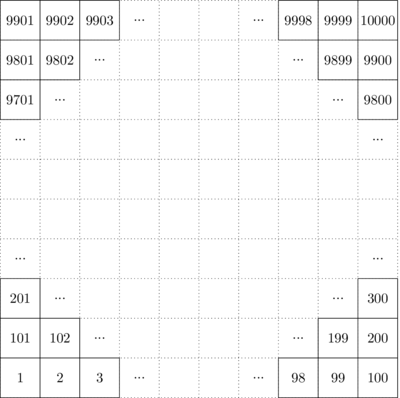

# Data in file

**Time interval**: this value indicates the starting time of a 10-minute time interval expressed in the 
number of milliseconds elapsed since 1st January 1970, UTC. The end of the time interval is obtained 
by adding 600 000 milliseconds (10 minutes). That means that the measurements are done every 10 
minutes.

# Data in file

- **SMS-in**: The country code indicates the country of the SMS sender.
- **SMS-out**: The country code indicates the country of the SMS receiver.
- **Call-in**: The country code indicates the country of the caller.
- **Call-out**: The country code indicates the country of the callee.
- **Internet**: The country code indicates the 
country of the user.

# Data in file

- Data registered in each line is calculated as an **aggregation** of Call Detail Record (CDR) generated by the Telecom Italia network
- SMS-in / SMS-out: A CDR is generated every time a user receives an SMS (SMS-in) or sends an SMS (SMS-out)
- Call-in / Call-out: A CDR is generated every time a user is called (Call-in) or makes a call (Call-out)
- Internet connection: A CDR is generated when a user starts an Internet connection or terminates an Internet connection.
- During the Internet connection, an additional CDR is generated when its duration reaches 15 mn or 5 MB since its last CDR 
- The data is normalized for confidentiality reasons

# Load data: direct read

In [29]:
from pathlib import Path
grid_file = Path(r'../../../Downloads/sms-call-internet-mi-2013-12-01.txt')
with open(grid_file) as f:
    print("".join(f.readline().replace('\t', ':') for _ in range(10)))

1:1385852400000:39:0.11098916961424417:0.16621436886121638:0.10920185950874473:0.16442705875571695:13.648437920592805
1:1385852400000:46:::::0.026137424264286602
1:1385853000000:39:0.16513682662061693:0.1763994583739133:0.030875085088185057:0.02730046487718618:13.330858194494864
1:1385853600000:0:0.029087774982685617:0.02730046487718618:::
1:1385853600000:39:0.18645109168870494:0.13658782275823106:0.05460092975437236::11.329552259939573
1:1385854200000:39:0.21965225800268914:0.38112896604000707:0.0825256641241584:0.13596355326563117:13.16616288096205
1:1385854800000:39:0.29511418007714996:0.11045039849394445:0.05460092975437236:0.07957531340575938:13.32165338919027
1:1385854800000:46:::::0.026137424264286602
1:1385855400000:39:0.052274848528573205:0.13542478214533146:0.05343788914147278:0.02730046487718618:12.434743835804813
1:1385856000000:0:0.026137424264286602::::



# Load data: custom class

It would be nice if we could understand:
- Time
- Country

# Load data: time for custom class

In [30]:
datetime.fromtimestamp(1385852400000/1000)

datetime.datetime(2013, 12, 1, 0, 0)

# Load data: custom class

In [31]:
soup = Soup(s.get('https://countrycode.org/').text)

In [32]:
ccs = {0: None}
for row in soup.table('tr'):
    tds = row('td')
    if tds:
        try:
            cc = int(tds[1].text)
            co = tds[2].text.split(' / ')[0]
            if cc in ccs:
                ccs[cc] += f"/{co}"
            else:
                ccs[cc] = co
        except ValueError:
            pass

# Load data: custom class

In [33]:
@dataclass
class CDR:
    loc: int
    t: datetime
    co: float
    sin: float
    sout: float
    cin: float
    cout: float
    web: float
        
    def conv(self, attr, typ):
        value = getattr(self, attr).strip()
        value = typ(value) if value else None
        setattr(self, attr, value)
              
    def __post_init__(self):
        for attr in ['loc', 't', 'co']:
            self.conv(attr, int)
        self.t = datetime.fromtimestamp(self.t/1000)
        self.co = ccs[self.co]
        for attr in ['sin', 'sout', 'cin', 'cout', 'web']:
            self.conv(attr, float)

# Load data: custom class

In [34]:
with open(grid_file) as f:
    data = [str(CDR(*f.readline().split('\t'))) for _ in range(10)]
data[:5]

["CDR(loc=1, t=datetime.datetime(2013, 12, 1, 0, 0), co='IT', sin=0.11098916961424417, sout=0.16621436886121638, cin=0.10920185950874473, cout=0.16442705875571695, web=13.648437920592805)",
 "CDR(loc=1, t=datetime.datetime(2013, 12, 1, 0, 0), co='SE', sin=None, sout=None, cin=None, cout=None, web=0.026137424264286602)",
 "CDR(loc=1, t=datetime.datetime(2013, 12, 1, 0, 10), co='IT', sin=0.16513682662061693, sout=0.1763994583739133, cin=0.030875085088185057, cout=0.02730046487718618, web=13.330858194494864)",
 'CDR(loc=1, t=datetime.datetime(2013, 12, 1, 0, 20), co=None, sin=0.029087774982685617, sout=0.02730046487718618, cin=None, cout=None, web=None)',
 "CDR(loc=1, t=datetime.datetime(2013, 12, 1, 0, 20), co='IT', sin=0.18645109168870494, sout=0.13658782275823106, cin=0.05460092975437236, cout=None, web=11.329552259939573)"]

# Load data: pandas

In [35]:
import pandas as pd
df = pd.read_csv(grid_file, sep='\t', names=['loc', 'ts', 'cc', 'sin', 'sout', 'cin', 'cout', 'web'], nrows=1000)
df

,loc,ts,cc,sin,sout,cin,cout,web
0,1,1385852400000,39,0.110989,0.166214,0.109202,0.164427,13.648438
1,1,1385852400000,46,NaN,NaN,NaN,NaN,0.026137
2,1,1385853000000,39,0.165137,0.176399,0.030875,0.027300,13.330858
3,1,1385853600000,0,0.029088,0.027300,NaN,NaN,NaN
4,1,1385853600000,39,0.186451,0.136588,0.054601,NaN,11.329552
...,...,...,...,...,...,...,...,...
995,100,1385912400000,39,0.282041,0.239578,0.402675,0.562394,21.319453
996,100,1385912400000,421,0.040774,NaN,NaN,NaN,NaN
997,100,1385912400000,49,NaN,NaN,NaN,NaN,0.040774
998,100,1385913000000,0,0.247186,NaN,NaN,NaN,NaN


# Load data: numpy

In [36]:
import numpy as np
with open(grid_file) as f:
    with open('small_data.txt','wt') as t:
        for _ in range(100):
            t.write(f.readline())
a = np.genfromtxt('small_data.txt', delimiter='\t')
a.shape

(100, 8)

# Load data: numpy

- Pro: Full access to numpy weaponry (i.e. SPEED!)
- Con: Needs fully heterogeneous data (same type); NaN needs to be handle with masked array to avoid issues

# Missing Data

- When there is no activity, there is no corresponding value
  - "" (empty string) in the input file
  - `None` in custom class
  - `NaN` (Not-a-Number) in dataframe
- if a (loc/time interval/cc) tuple has no activity whatsoever, it has no row in the file

## Analytics

### Statistics

# Numpy

Numpy provides basic analytics tools.

Change display format for easy to read results.

In [37]:
np.set_printoptions(formatter={'float': '{:.2f}'.format})

# Numpy

Sum of each column.

In [38]:
a.sum(axis=0)

array([100.00, 138586941000000.00, 3202.00, nan, nan, nan, nan, nan])

NaN propagates so we need to mask NaN values.

In [39]:
ma = np.ma.array(a, mask=np.isnan(a))
ma.sum(axis=0).data

array([100.00, 138586941000000.00, 3202.00, 10.19, 5.29, 1.90, 3.32,
       464.02])

# Numpy

Average value.

In [40]:
ma.mean(axis=0).data

array([1.00, 1385869410000.00, 32.02, 0.15, 0.09, 0.06, 0.07, 6.36])

Standard deviation.

In [41]:
ma.std(axis=0).data

array([0.00, 9674848.84, 26.57, 0.16, 0.10, 0.05, 0.08, 4.47])

Minimum values.

In [42]:
ma.min(axis=0).data

array([1.00, 1385852400000.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00])

Maximum.

In [43]:
ma.max(axis=0).data

array([1.00, 1385884800000.00, 226.00, 0.70, 0.46, 0.22, 0.40, 18.15])

# Pandas

In [44]:
import pandas as pd
with StringIO(big_mac) as csvfile:
    big_mac_df = pd.read_csv(csvfile)
big_mac_df

,name,iso_a3,currency_code,local_price,dollar_ex,GDP_dollar,date
0,Argentina,ARG,ARS,2.50,1.000000,NaN,2000-04-01
1,Australia,AUS,AUD,2.59,1.680000,NaN,2000-04-01
2,Brazil,BRA,BRL,2.95,1.790000,NaN,2000-04-01
3,Britain,GBR,GBP,1.90,0.632911,NaN,2000-04-01
4,Canada,CAN,CAD,2.85,1.470000,NaN,2000-04-01
...,...,...,...,...,...,...,...
1943,Uruguay,URY,UYU,255.00,41.910000,15169.153,2022-07-01
1944,United States,USA,USD,5.77,1.000000,63078.471,2022-07-01
1945,Venezuela,VEN,VES,10.00,5.673200,1690.659,2022-07-01
1946,Vietnam,VNM,VND,69000.00,23417.000000,3520.738,2022-07-01


# Pandas

Method `describe` lists the statistical properties of each attribute.

In [45]:
big_mac_df.describe()

,local_price,dollar_ex,GDP_dollar
count,1.948000e+03,1.948000e+03,1335.000000
mean,1.579990e+04,4.705368e+03,26843.737719
std,3.938029e+05,1.005706e+05,21221.698643
min,0.000000e+00,0.000000e+00,1049.749000
25%,4.450000e+00,1.007487e+00,8952.110000
50%,1.500000e+01,5.490525e+00,20590.962000
75%,8.700000e+01,3.282625e+01,43422.819000
max,1.602000e+07,3.613989e+06,100578.968000


# Pandas

Method `apply` allows to apply a formula. Example: compute prices in dollars.

In [46]:
import numpy as np
big_mac_df['dollar_price'] = big_mac_df.apply(lambda r: r['local_price']/r['dollar_ex']
                                              if r['dollar_ex'] else np.nan, axis=1)

# Pandas

In [47]:
big_mac_df['dollar_price'].describe()

count    1947.000000
mean        3.523341
std         2.250275
min         0.639966
25%         2.506312
50%         3.412945
75%         4.325999
max        85.967465
Name: dollar_price, dtype: float64

# Pandas

In [48]:
big_mac_df.iloc[big_mac_df['dollar_price'].idxmax()]

name                Lebanon
iso_a3                  LBN
currency_code           LBP
local_price        130000.0
dollar_ex            1512.2
GDP_dollar          4002.74
date             2022-07-01
dollar_price      85.967465
Name: 1915, dtype: object

In [49]:
big_mac_df.iloc[big_mac_df['dollar_price'].idxmin()]

name             Saudi Arabia
iso_a3                    SAU
currency_code             SAR
local_price               2.4
dollar_ex              3.7502
GDP_dollar                NaN
date               2004-05-01
dollar_price         0.639966
Name: 147, dtype: object

### Visualization

# Matplotlib

- Matplotlib's `pyplot` module is the main tool for data visualization in Python
- Other tools exist (e.g. for dynamic visualization) but `pyplot` is a very good Swiss-army-knife
- Can be interfaced with numpy, Python lists, dataframe

# Histogram

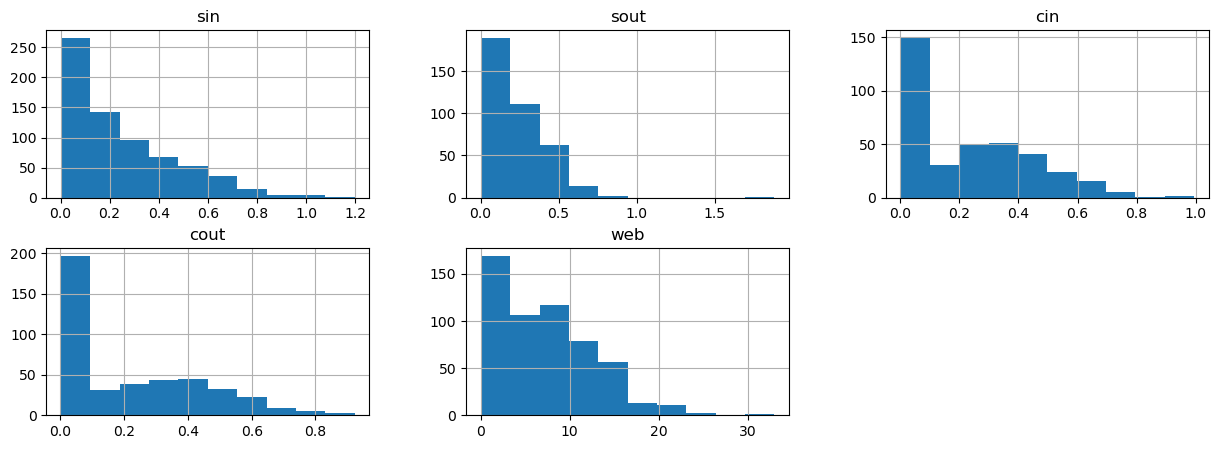

In [50]:
from matplotlib import pyplot as plt
df.hist(column=['sin', 'sout', 'cin', 'cout', 'web'], layout=(2, 3), figsize=(15, 5))
plt.show()

# Histogram

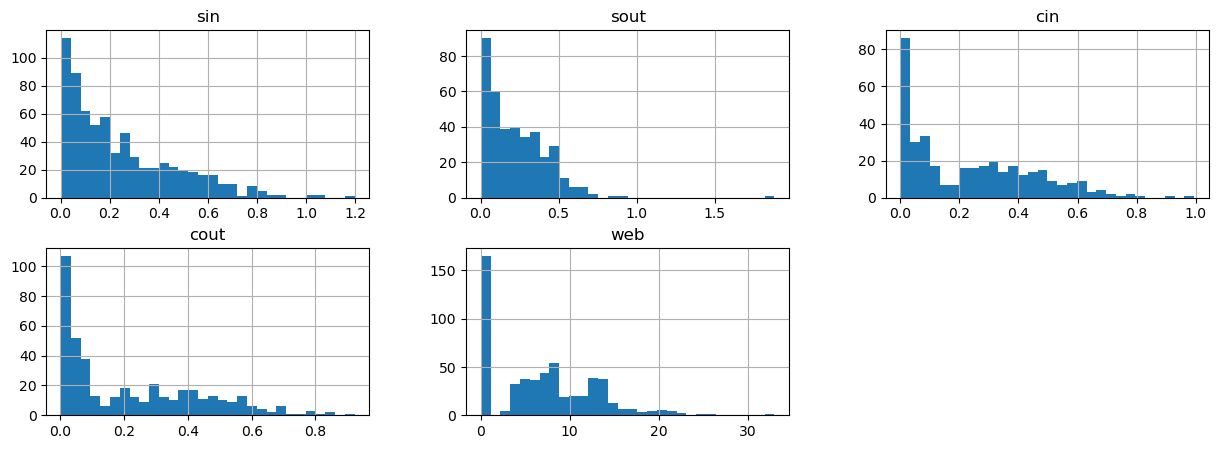

In [51]:
from matplotlib import pyplot as plt
df.hist(column=['sin', 'sout', 'cin', 'cout', 'web'], layout=(2, 3), figsize=(15, 5), bins=30)
plt.show()

# Density

In [52]:
df.plot(kind='density', column=['sin', 'sout', 'cin', 'cout', 'web'], subplots=True, figsize=(15, 5), layout=(1, 3))
plt.show()

ValueError: Layout of 1x3 must be larger than required size 8

<Figure size 1500x500 with 0 Axes>

# Density

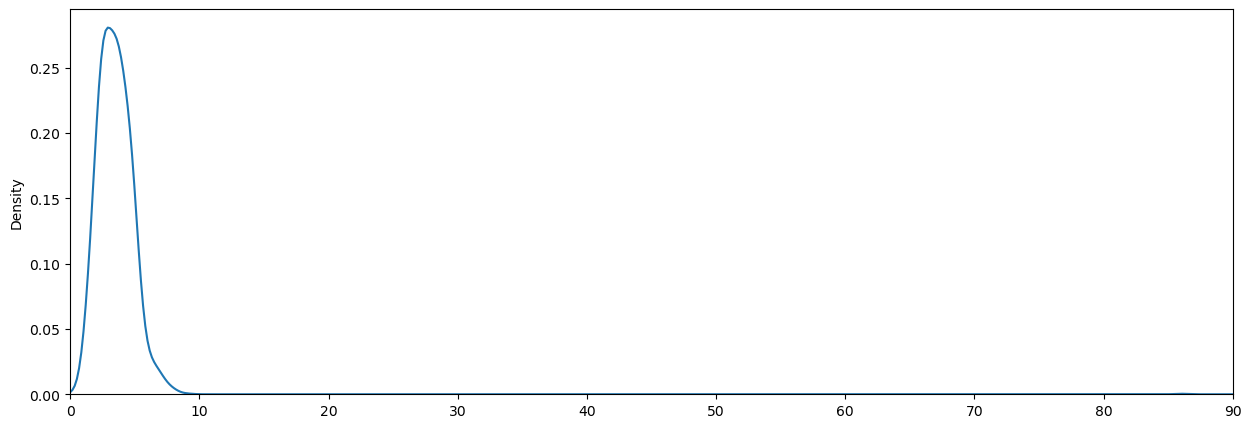

In [53]:
big_mac_df['dollar_price'].plot(kind='density', figsize=(15, 5))
plt.xlim([0, 90])
plt.ylim([0, None])
plt.show()

# Cumulative Distribution Function (CDF)

In [54]:
def make_cdf(df, col):
    dp = np.array(df[col])
    dp = dp[~np.isnan(dp)]
    n = len(dp)
    return np.sort(dp), np.arange(1, n+1)/n

In [55]:
def subplot_by_year(ys):
    n = len(ys)
    fig, axs = plt.subplots(nrows=1, ncols=n, figsize=(15, 5))
    for i, y in enumerate(ys):
        bm = big_mac_df[(big_mac_df['date'] == f'{y}-07-01')]
        axs[i].plot(*make_cdf(bm, 'dollar_price'))
        axs[i].set_ylim([0, 1])
        axs[i].set_xlabel('Big Mac price (dollars)')
        axs[i].set_title(str(y))
    axs[0].set_ylabel('Cumulative Distribution Function')
    plt.show()

# CDF

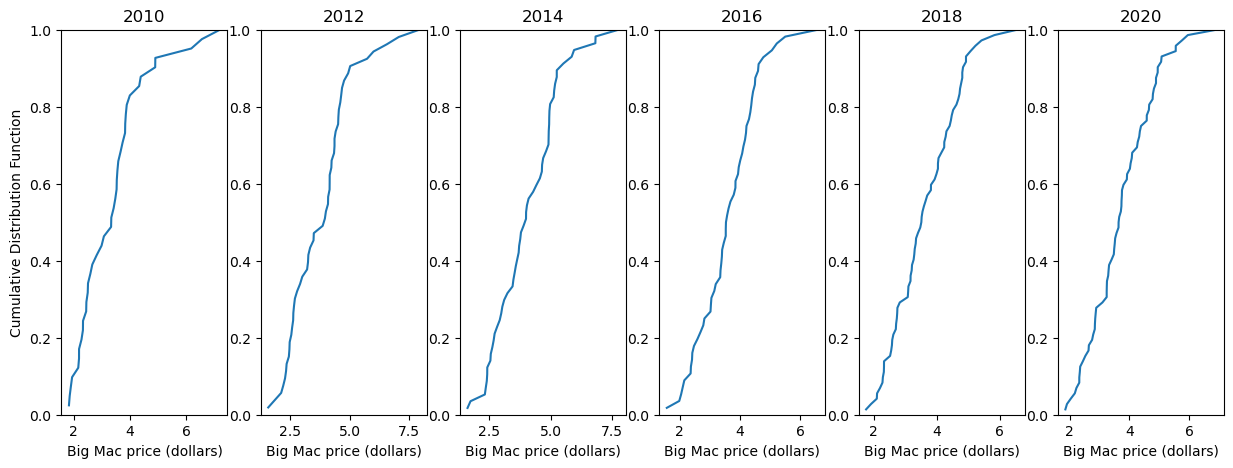

In [56]:
subplot_by_year(range(2010, 2021, 2))

# CDF

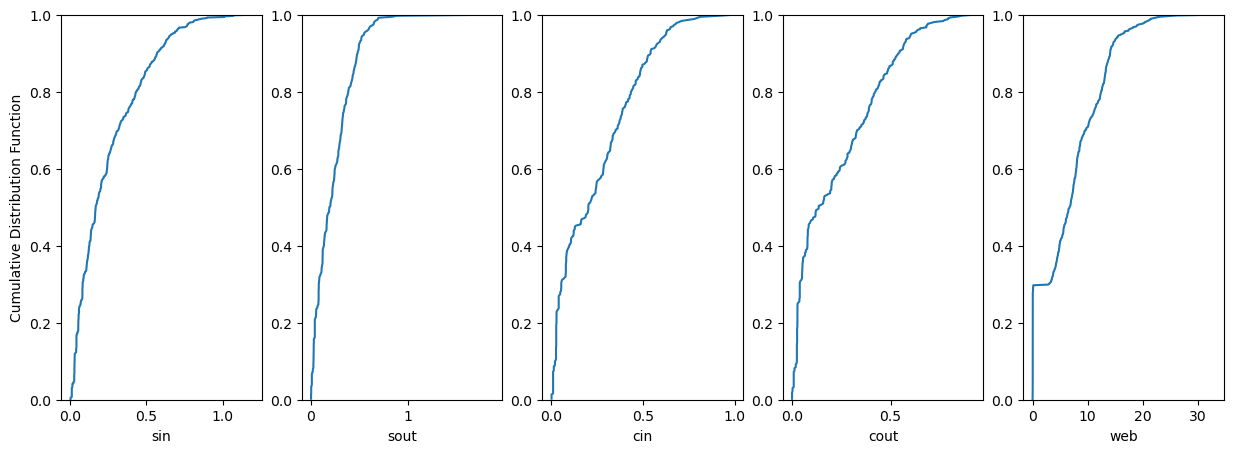

In [57]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(15, 5))
for i, col in enumerate(['sin', 'sout', 'cin', 'cout', 'web']):
    axs[i].plot(*make_cdf(df, col))
    axs[i].set_ylim([0, 1])
    axs[i].set_xlabel(col)
axs[0].set_ylabel('Cumulative Distribution Function')
plt.show()

# Box & whiskers

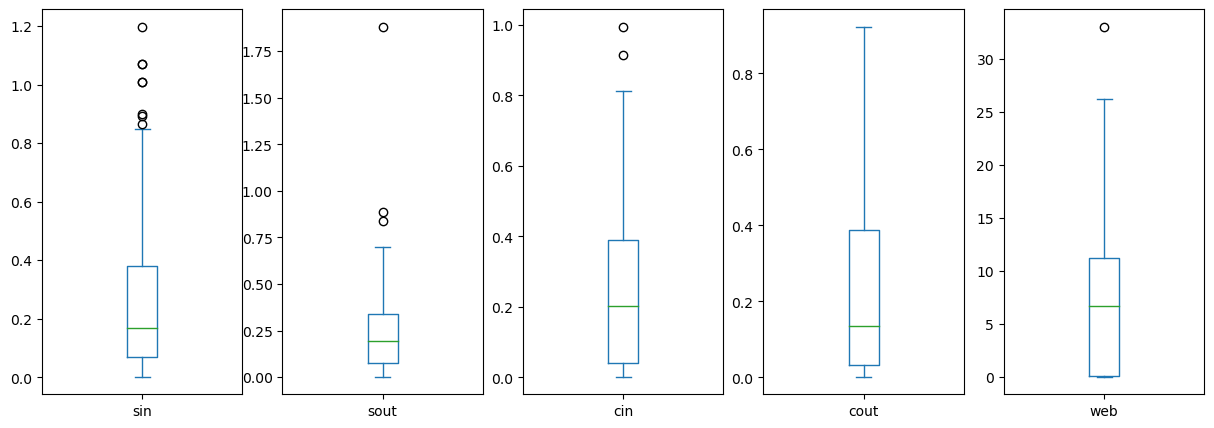

In [58]:
df.plot(kind='box', column=['sin', 'sout', 'cin', 'cout', 'web'], subplots=True, figsize=(15, 5)) # , layout=(1, 3), 
plt.show()

# Box & whiskers

The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of box to show the range of the data. By default, they extend no more than 1.5 * IQR (IQR = Q3 - Q1) from the edges of the box, ending at the farthest data point within that interval. Outliers are plotted as separate dots.

# Box & whiskers

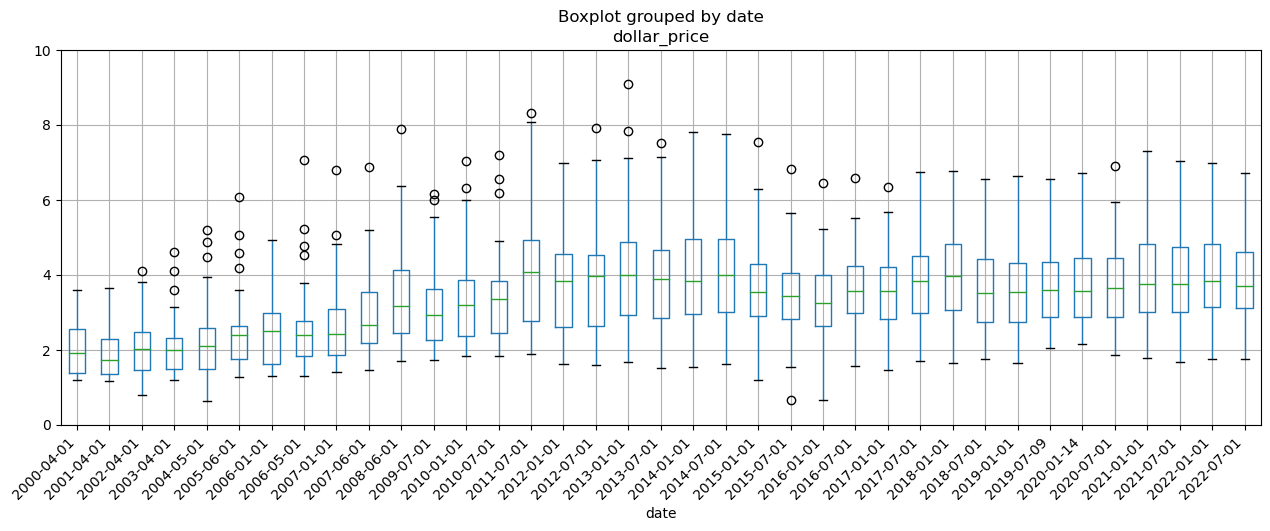

In [59]:
f, a = plt.subplots(figsize=(15, 5))
big_mac_df.boxplot(column=['dollar_price'], by='date', figsize=(15, 5), rot=45, ax=a)
a.set_xticklabels(labels=a.get_xticklabels(), ha='right')
plt.ylim([0, 10])
plt.show()

# Scatter plots

Scatter plots present the relationship between two variables as dots in two dimensions, 
one axis for each attribute

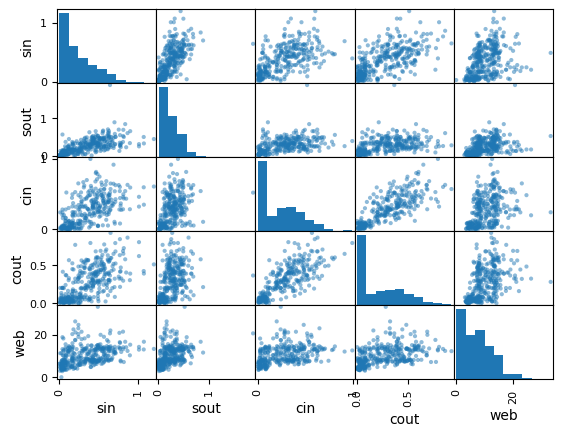

In [60]:
from pandas.plotting import scatter_matrix
scatter_matrix(df.iloc[:, 3:])
plt.show()

## Mobile 

# Mobile data analysis: use case

- Research paper: *Complementary Base Station Clustering for Cost-Effective and Energy-Efficient Cloud-RAN*, by Longbiao Chen, Thi-Mai-Trang Nguyen, Gang Pan, Jérémie Jakubowicz, Linjin Liu, et al... Presented at 14th IEEE International Conference on Ubiquitous Intelligence and Computing (UIC 2017), Aug 2017, San Francisco, CA, United States.
https://hal.archives-ouvertes.fr/hal-01527851
- Goal: show use of data analytics in a real case

# Mobile traffic demand

- Mobile traffic is not uniform
- Spatio: office vs. residential areas
- Temporal: peak hours vs. off-peak hours
- Complementarity: not everywhere at the same time

<img src="bbu_principle.PNG" width="500">

# Base station clustering

- Goal: optimize the load of BBU pools to increase the efficiency of statistical multiplexing.
- Base stations having complementary traffic profiles are assigned to the same BBU Pool
- Aggregated traffic is more stable $\rightarrow$ increased resource utilization rate $\rightarrow$ reduced energy consumption
- Non-overlapping peaks $\rightarrow$ reused peak capacity $\rightarrow$ reduced deployment cost

# Traffic profile of a base station

Traffic profile depends on
- Weekday / weekend
- Day time
- Residential / business areas

<img src="week_pattern.PNG" width="500">

# How to represent traffic profile?

For each base station $s$:
- $(u_{s,h})_{1\leq h\leq 24}$: average traffic intensity at hour $h$ during the work week.
- $(v_{s,h})_{1\leq h\leq 24}$: average traffic intensity at hour $h$ during the weekend.
- Traffic profile of $s$: $f(s):=[u_{s,1}, \ldots, u_{s,24}, v_{s,1}, \ldots, v_{s,24}]:=[w_{s, h}]_{1\leq h\leq 48}.$

# Base station complementarity

- Base stations having non-overlapping peak-times in their traffic profiles are complementary.
- For a set S of BS, compute the total traffic in S at each time slot: $f(S)=[\sum_{s\in S}w_{s, h}]_{1\leq h\leq 48}$.
- Calculate the Shannon entropy of a group $S$
$$H(S)=-\sum_{h=1}^{48} p_h\log(p_h)\text{, with } p_h=\frac{\sum_s w_{s, h}}{\sum_{s, h}w_{s, h}}.$$

High $H(S)$ means that base stations are complementary.

# Base station complementarity

A metric similar to complementarity is stability: The more aggregated traffic is stable, the better network capacity utilization is
- To measure the capacity utilization rate of the BBU Pool
$$U(S)=\frac{\mathrm{mean}(f(S)}{\max(f(S)}$$
- To take into account both complementarity and stability we define a new metric
$$M(S)=U(S).H(S)$$

# C-RAN dimensioning problem

Given a city with traffic profiles and base station coordinates
- What is the optimal number of BBU Pools? 
- What is the optimal RRH-BBU Pool mapping?

This is a clustering problem
- Network is modeled as a graph G = (V, E)
- Each base station is a node
- Merging two RRHs has a feasibility (distance), a cost (required capacity), and a gain ($M(S)$)
- Find the optimal number of clusters and the optimal base station 
assignment to maximize the capacity utilization rate and to minimize 
the required capacity of the BBU Pools

# Clustering algorithm

Key idea:
- Assign each station a cluster label
- Iteratively try to find for each BS a better label

Details: https://hal.archives-ouvertes.fr/hal-01527851

# Performance metrics

- Gain in term of required network capacity
$$\mathrm{Cost} = \frac{\sum_{S\in C}\max(f(S))}{\sum_{s}\max(f(s))}\text{ (lower is better).}$$
- Gain in term of resource utilization
$$\mathrm{Util} = \frac{\mathrm{mean}_{S\in C}(U(S))}{\mathrm{mean}_{s}(U(s))}\text{ (higher is better).}$$

# Performance analysis

|  | Cost | Util |
| --- | --- | --- |
| DCCA | 87.12% | 109.45% |
| DC | 96.68% | 102.95% |

- DCCA (Distance and Complementarity Constraint Algorithm)
- DC (Distance constraint)

<img src="results.PNG" width="500">

# The End!